# EarthLink

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

from config import speed_labels
from analysis import (
    race, income, redlining, 
    plot_race, speed_breakdown, 
    unserved, bucket_and_bin
)

In [3]:
# inputs
fn_earthlink = '../data/output/speed_price_earthlink.csv.gz'

# outputs
fn_speed = '../data/output/figs/fig1_el.csv'

In [4]:
el = pd.read_csv(fn_earthlink, compression='gzip')

/home/chino/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
len(el)

559974

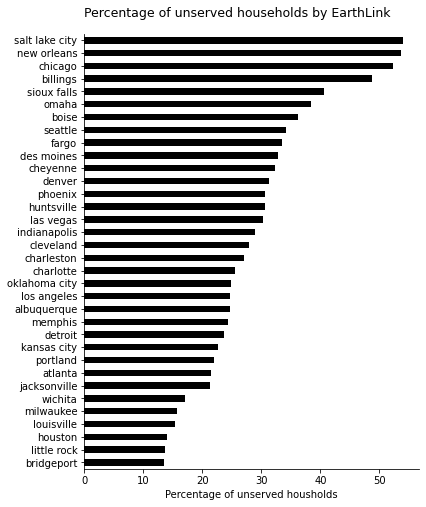

In [6]:
unserved(el, isp='EarthLink', height=8)

In [7]:
# which ISPs are being leased in each city?
el.groupby(['major_city', 'state']).contract_provider.value_counts()

major_city      state  contract_provider
albuquerque     NM     CenturyLink          10542
atlanta         GA     AT&T                  9208
billings        MT     CenturyLink           1975
boise           ID     CenturyLink           4278
bridgeport      CT     Frontier              3167
                       AT&T                     3
                       CenturyLink              1
charleston      SC     AT&T                  3132
                WV     Frontier              1296
charlotte       NC     AT&T                 15222
cheyenne        WY     CenturyLink           1413
chicago         IL     AT&T                 27829
cleveland       OH     AT&T                  9885
denver          CO     CenturyLink          11566
des moines      IA     CenturyLink           4519
detroit         MI     AT&T                 19763
                       CenturyLink              2
fargo           ND     CenturyLink           1630
houston         TX     AT&T                 45981
huntsvill

In [8]:
# throw out Frontier-leased offers and no service
el = el[el['contract_provider'].isin(['AT&T', 'CenturyLink'])]
el = el[el['speed_down'] != 0]

In [9]:
el.major_city.nunique()

34

In [10]:
len(el)

390697

In [11]:
el = bucket_and_bin(el)

In [12]:
# these cities only have slow speeds
s = el.groupby(['major_city', 'state']).speed_down_bins.nunique()
to_skip = s[s == 1].index.get_level_values(0).tolist()
to_skip

['albuquerque',
 'billings',
 'boise',
 'cheyenne',
 'denver',
 'des moines',
 'fargo',
 'omaha',
 'phoenix',
 'portland',
 'salt lake city',
 'seattle',
 'sioux falls']

In [23]:
290186 + 90750 + 180067 + 356051

917054

In [13]:
len(to_skip)

13

In [14]:
# filter out cities with only slow speeds
el = el[~el.major_city.isin(to_skip)]

/home/chino/code/1_production-grade/isp/notebooks/analysis.py:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


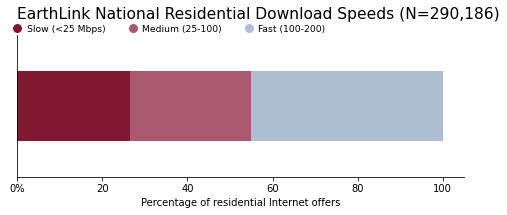

In [15]:
speed_breakdown(el, isp='EarthLink')

In [16]:
pd.DataFrame(el.speed_down_bins.value_counts(normalize=True).sort_index()[1:]).to_csv(fn_speed)

In [17]:
upspeed = 10
len(el[el.speed_up >= upspeed]) / len(el)

0.45083153563576467

/home/chino/code/1_production-grade/isp/notebooks/analysis.py:431: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


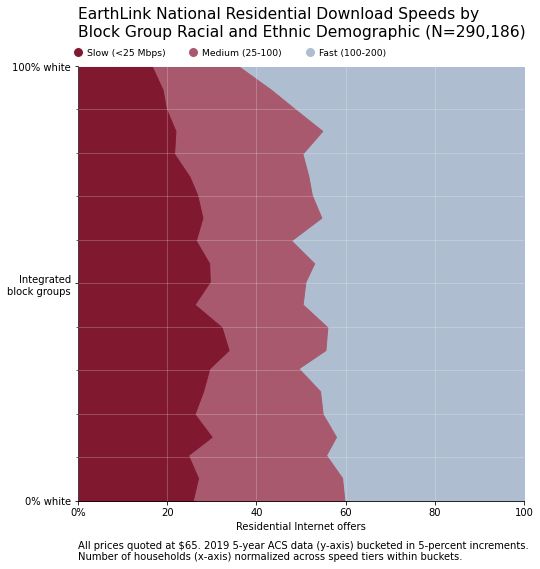

In [18]:
plot_race(el, isp='EarthLink', price='$65')

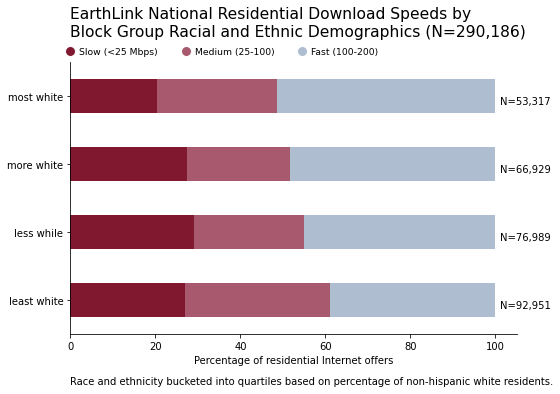

In [19]:
race(el, isp='EarthLink')

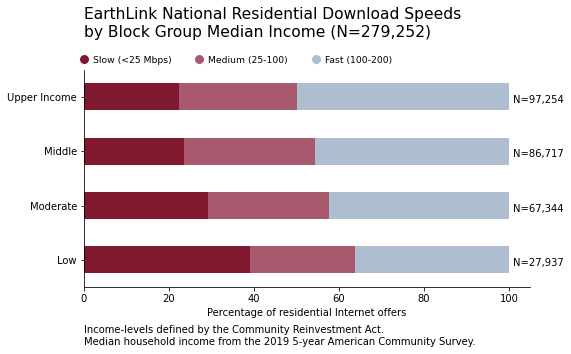

In [20]:
income(el, isp='EarthLink')

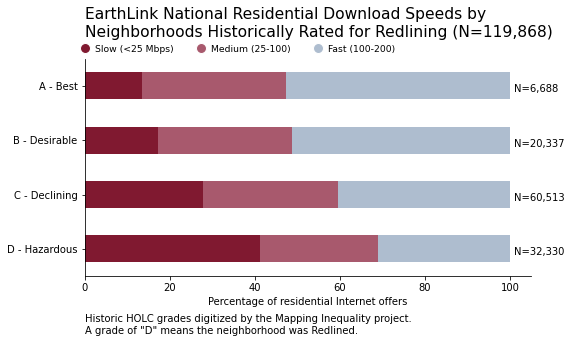

In [21]:
redlining(el, isp='EarthLink')

atlanta GA 9208 AT&T


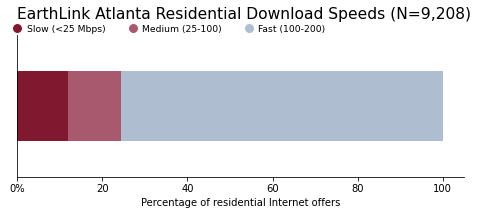

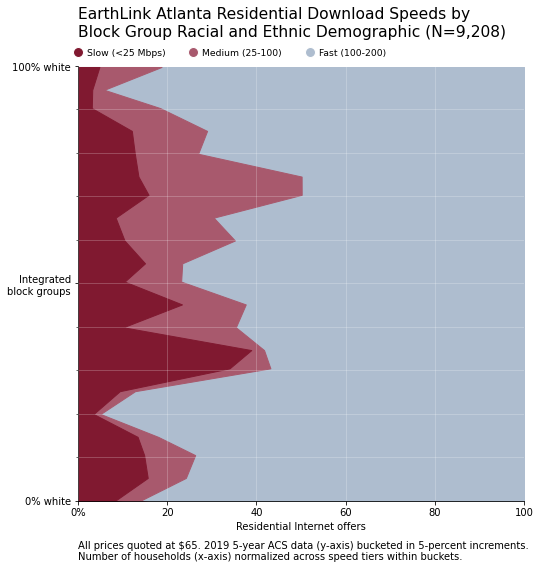

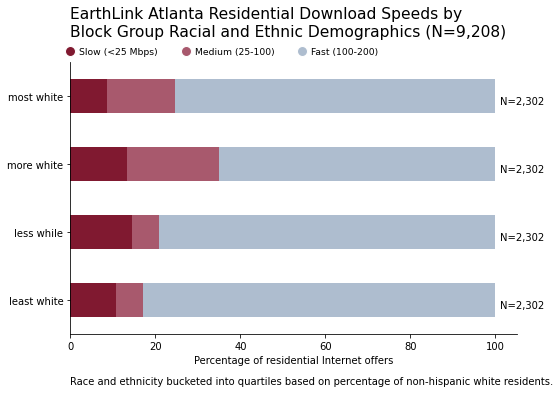

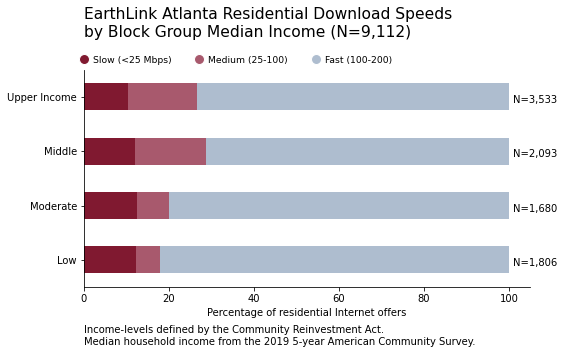

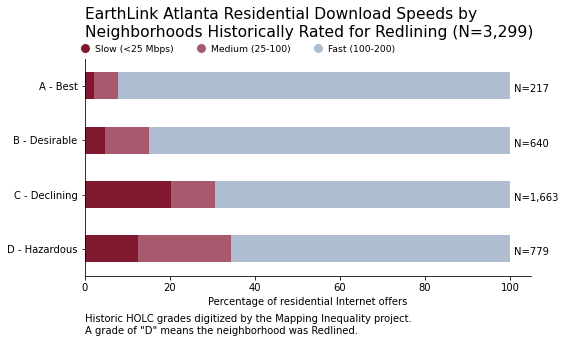

*******************************************************************************
bridgeport CT 4 AT&T


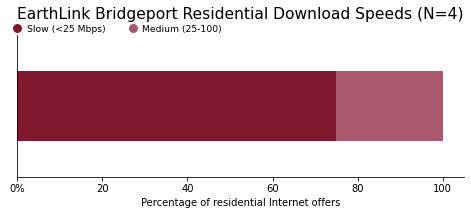

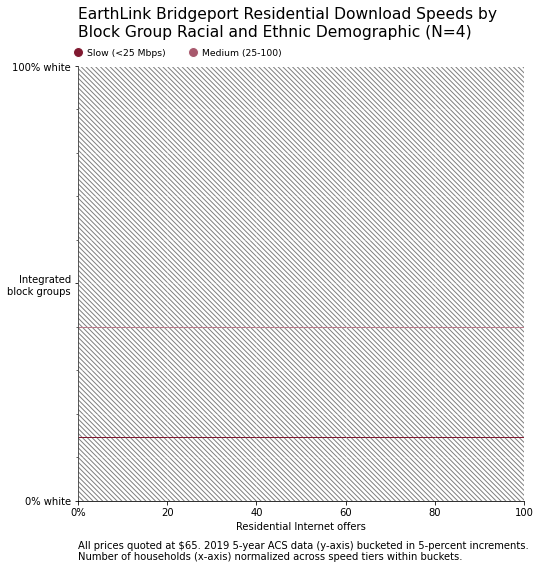

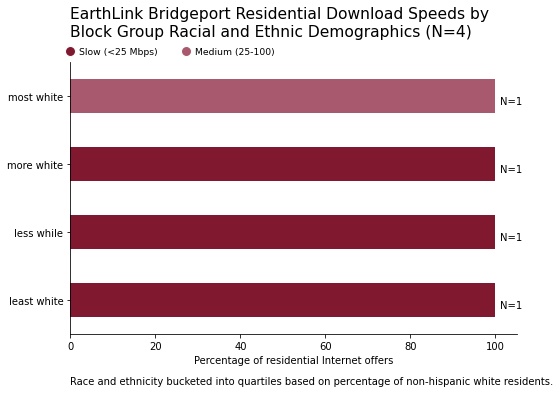

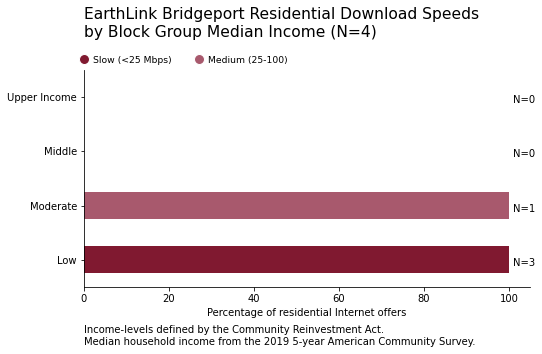

*******************************************************************************
charleston SC 3132 AT&T


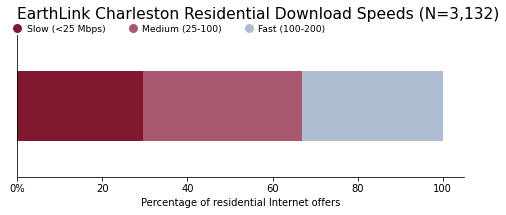

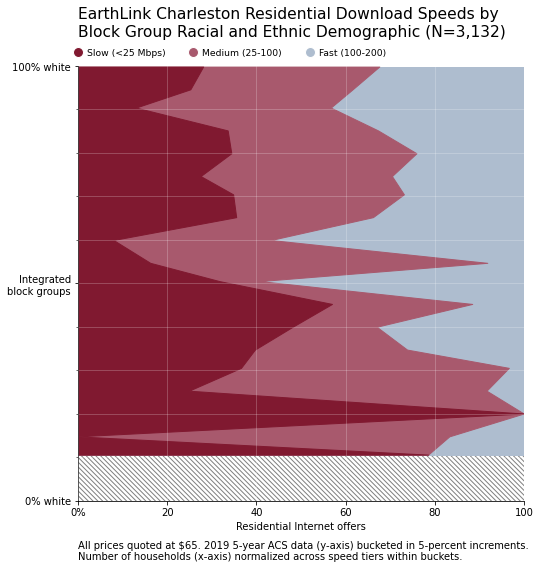

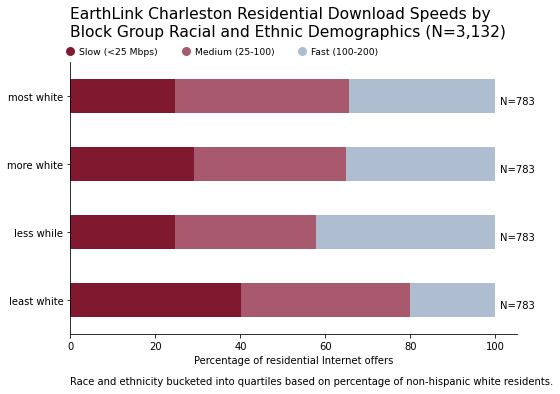

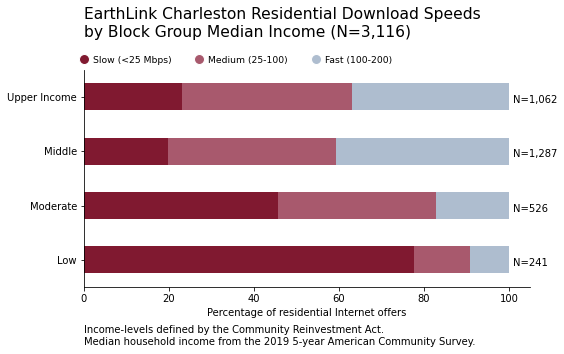

*******************************************************************************
charlotte NC 15222 AT&T


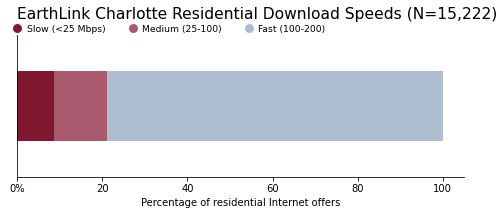

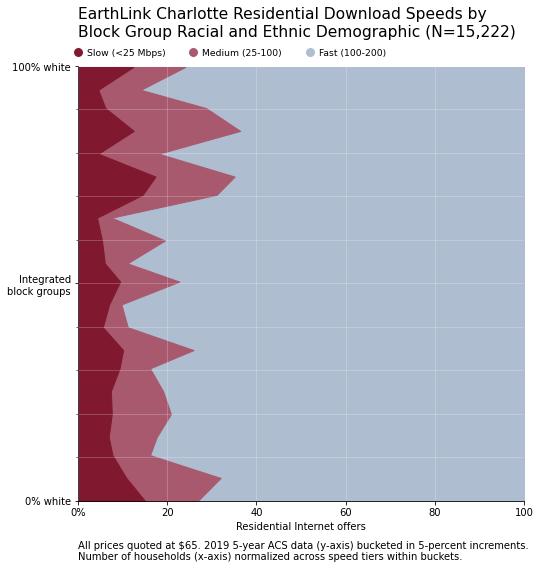

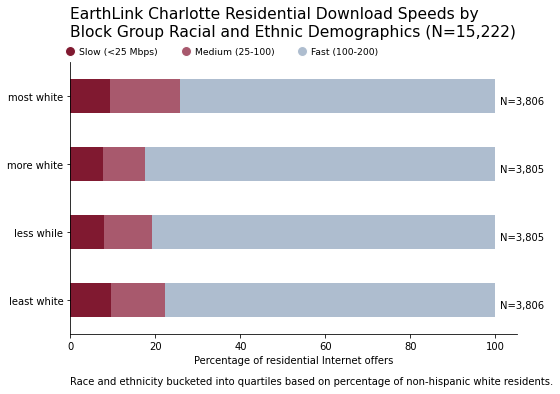

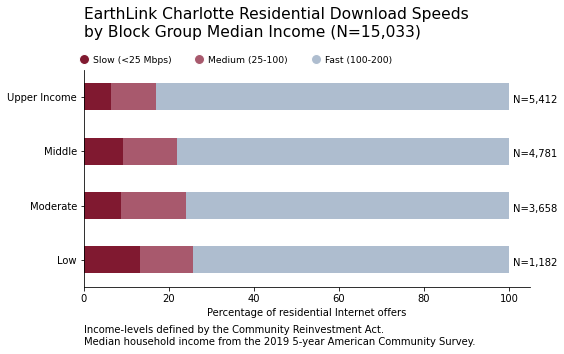

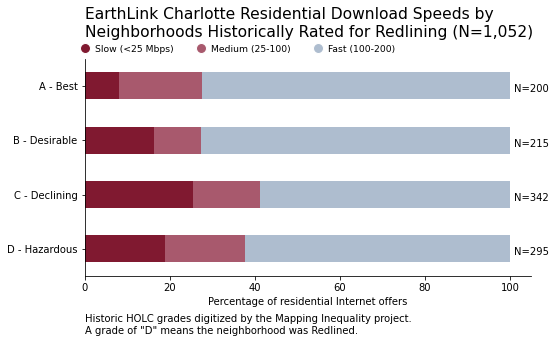

*******************************************************************************
chicago IL 27829 AT&T


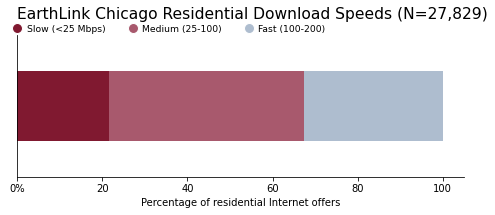

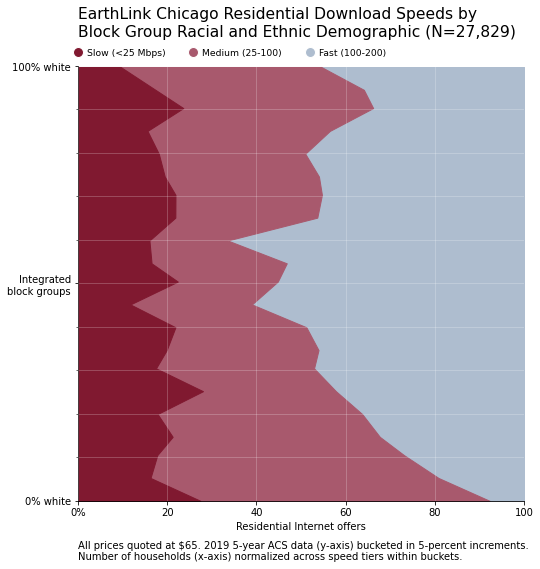

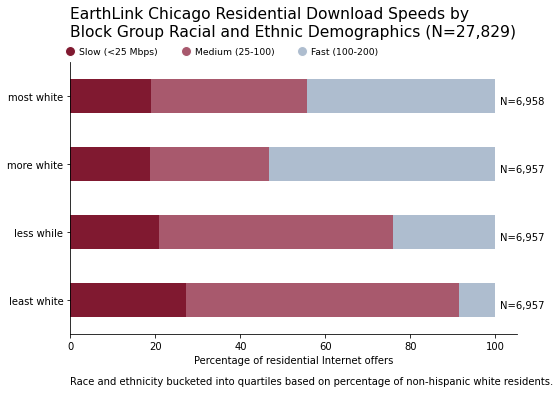

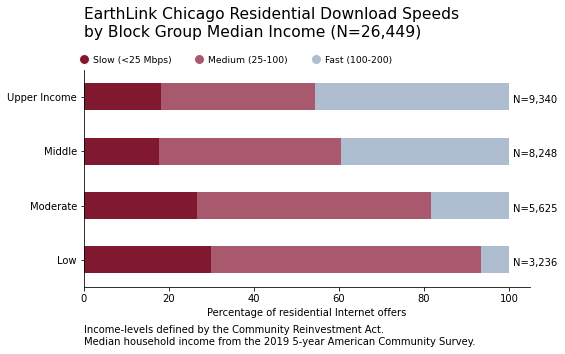

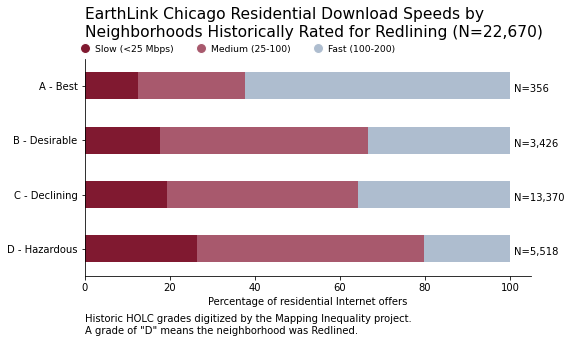

*******************************************************************************
cleveland OH 9885 AT&T


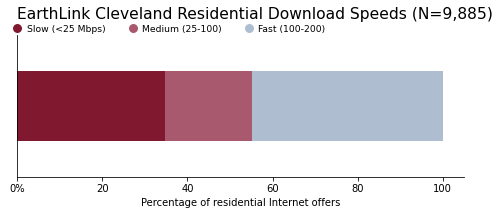

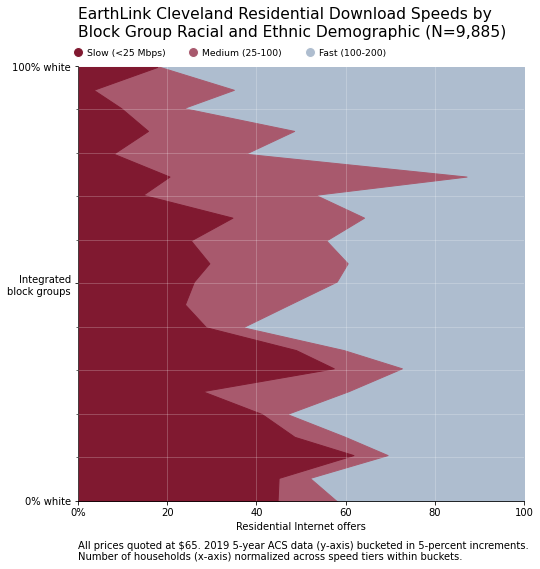

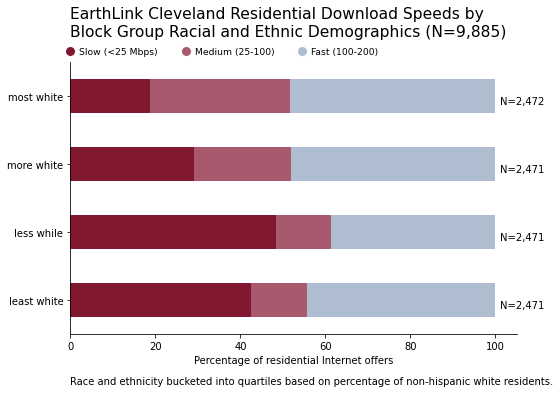

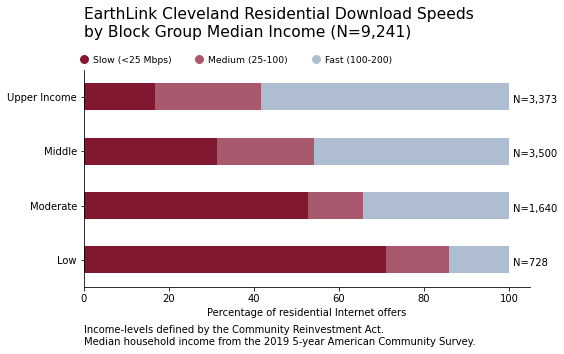

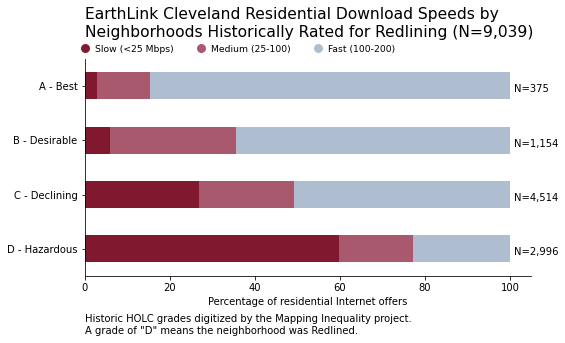

*******************************************************************************
detroit MI 19765 AT&T


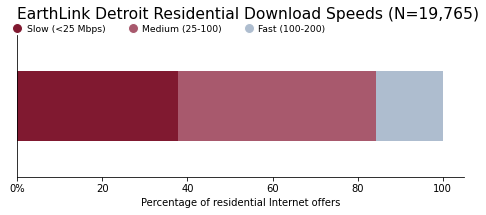

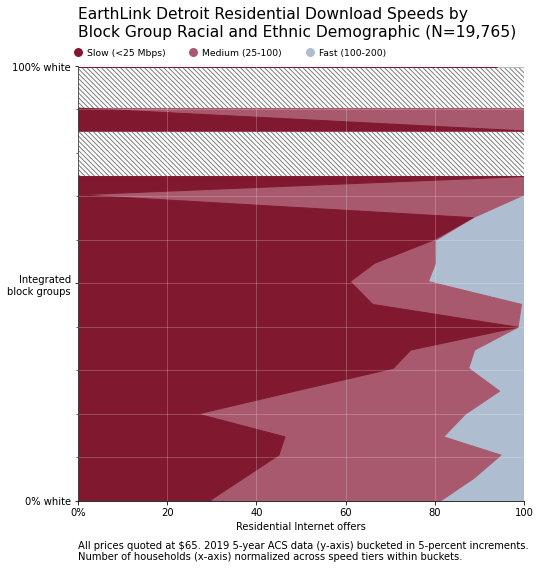

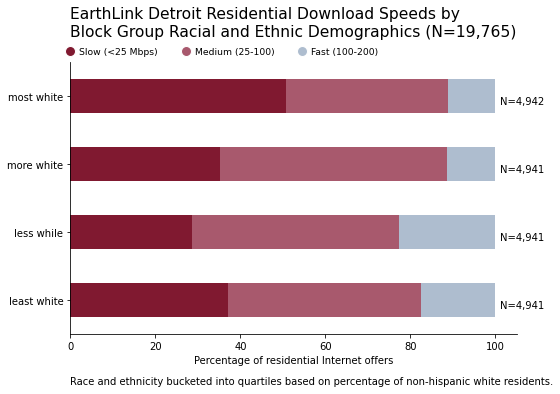

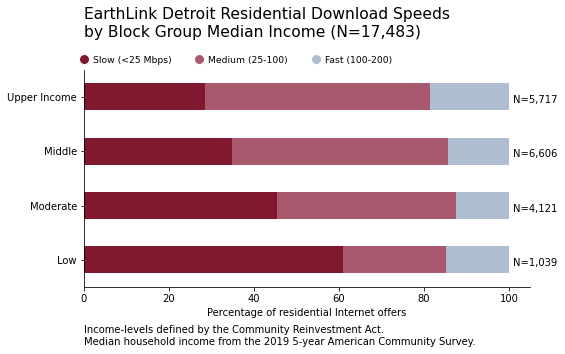

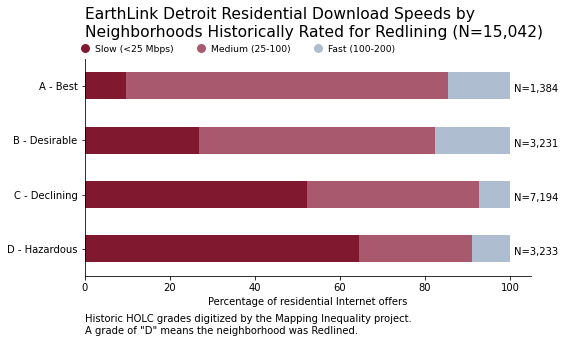

*******************************************************************************
houston TX 45981 AT&T


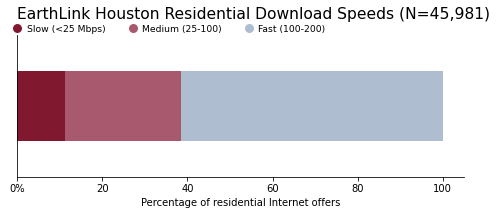

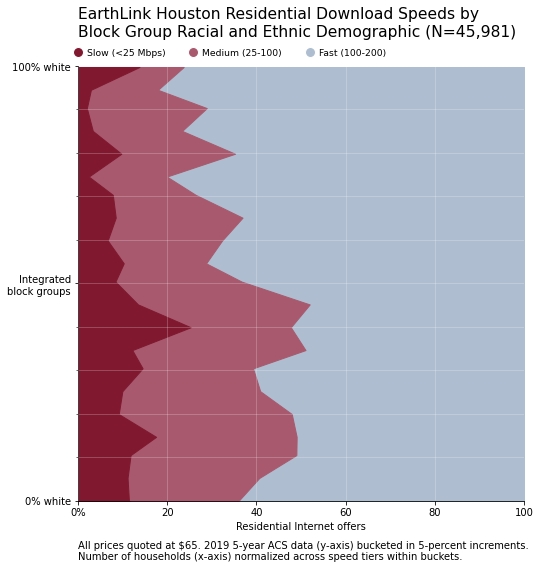

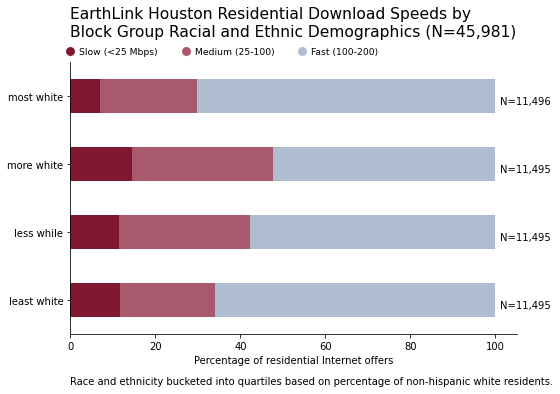

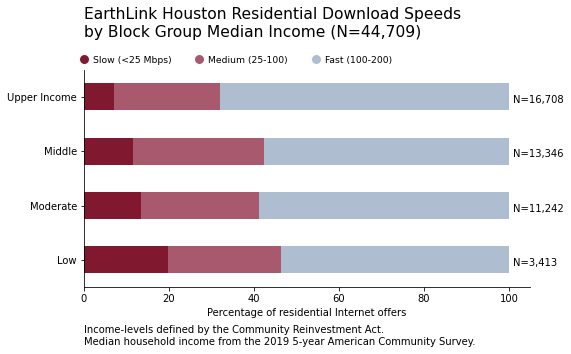

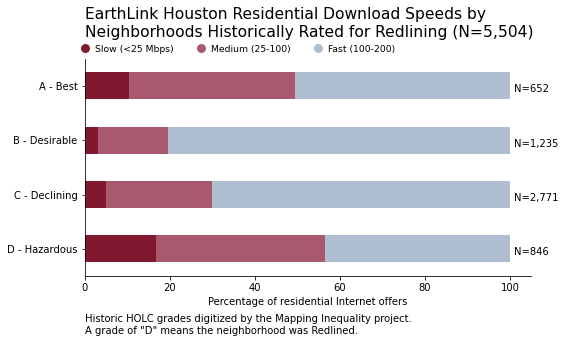

*******************************************************************************
huntsville AL 3789 AT&T


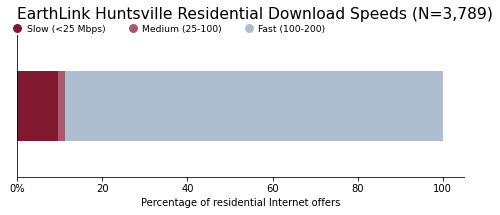

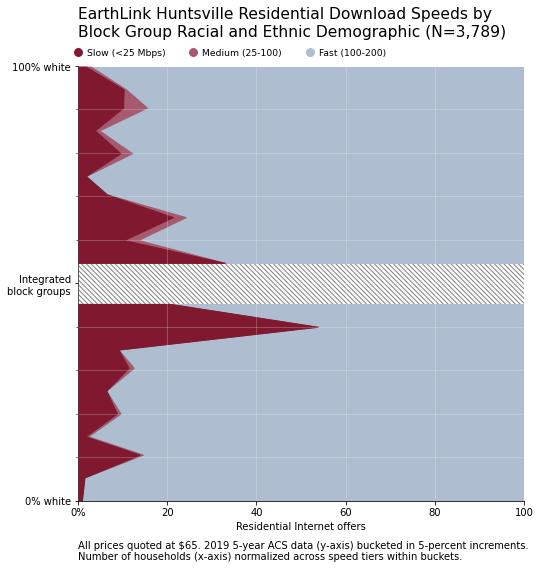

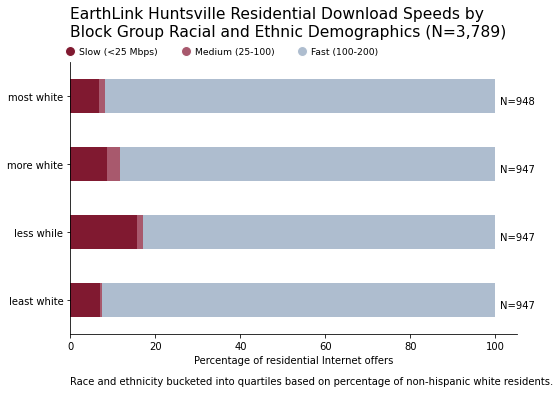

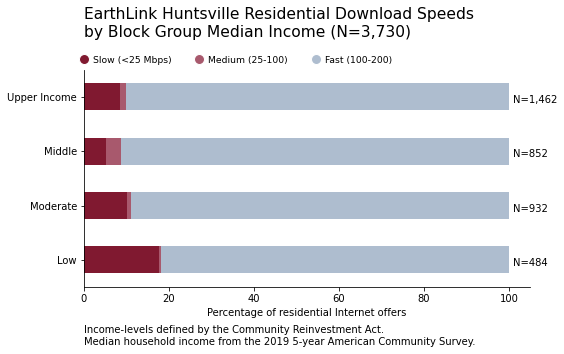

*******************************************************************************
indianapolis IN 10645 AT&T


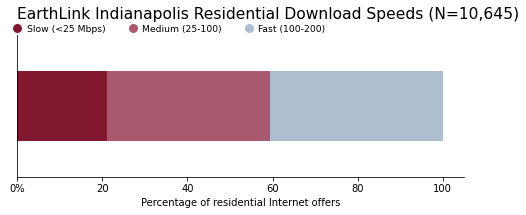

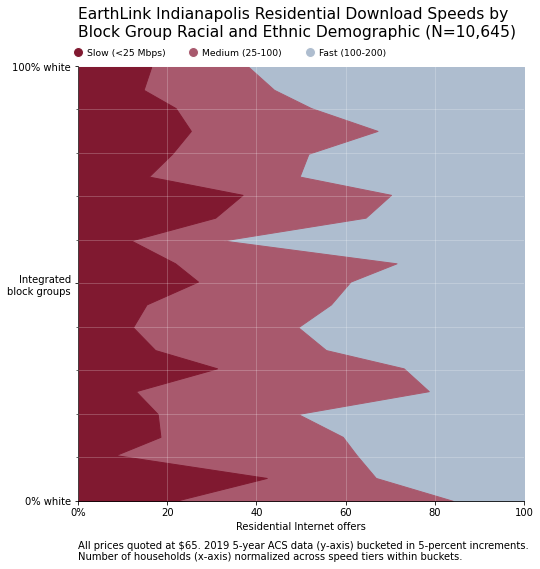

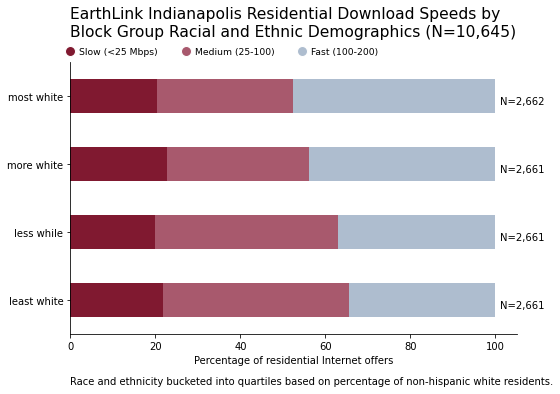

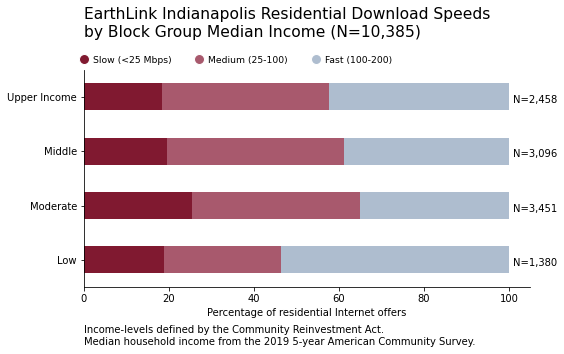

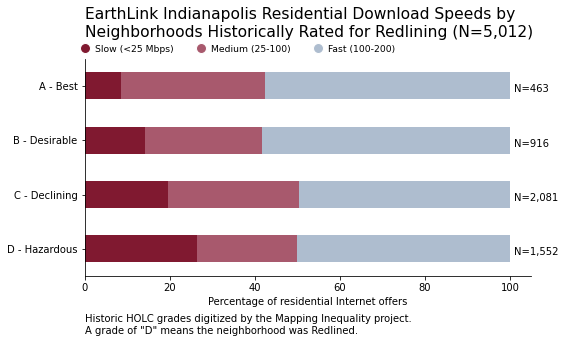

*******************************************************************************
jacksonville FL 18273 AT&T


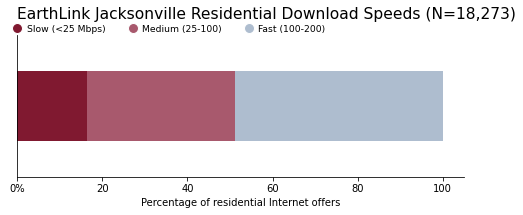

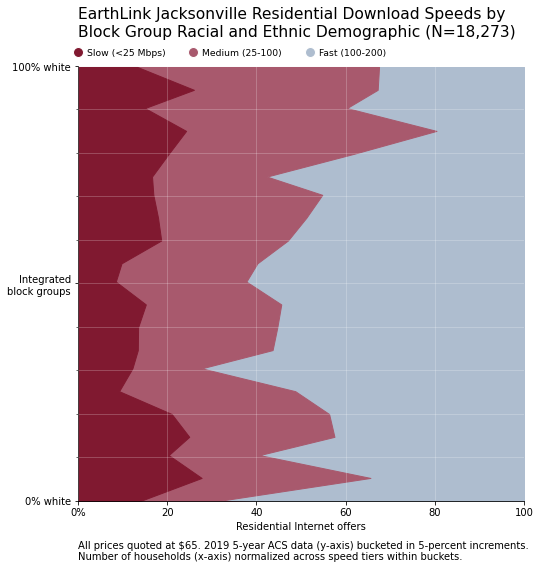

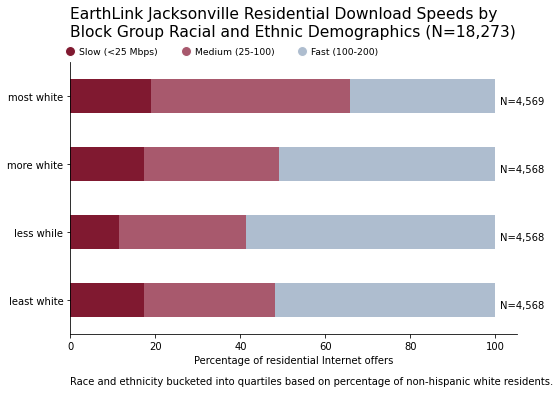

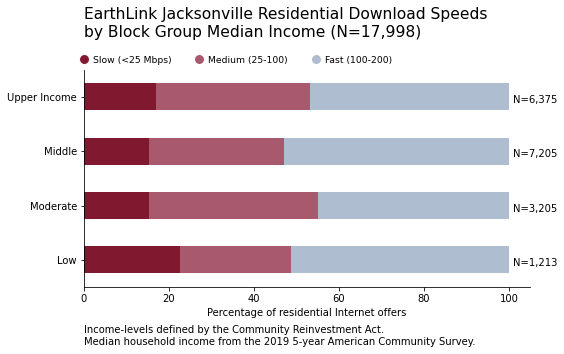

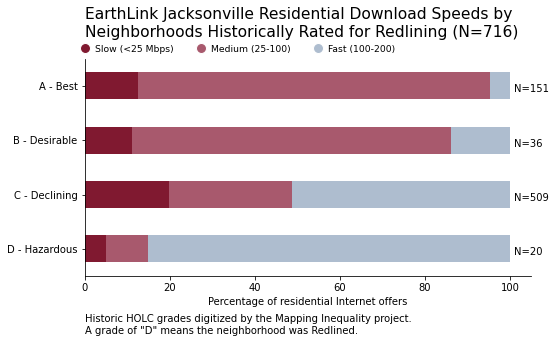

*******************************************************************************
kansas city MO 13405 AT&T


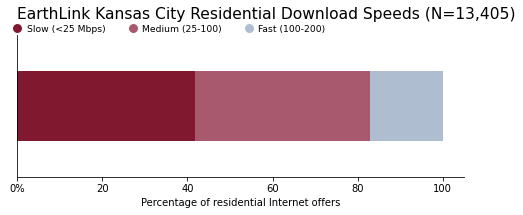

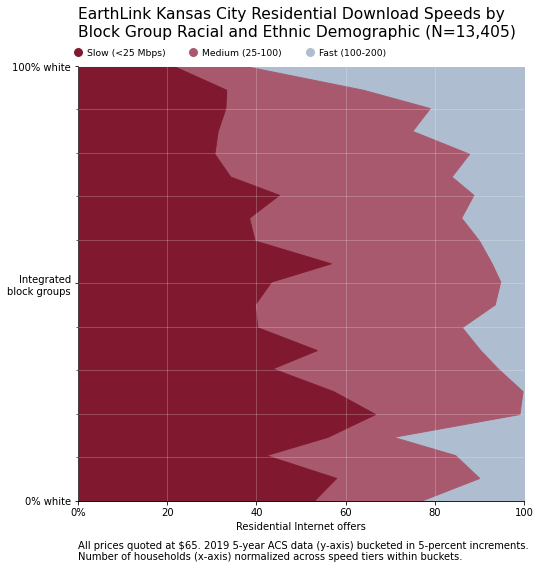

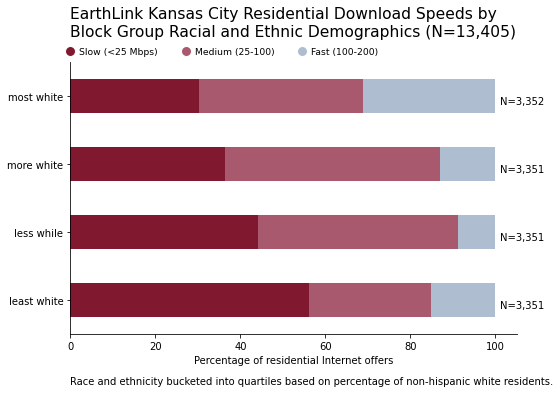

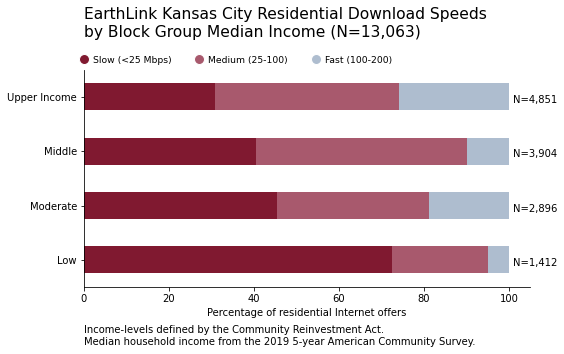

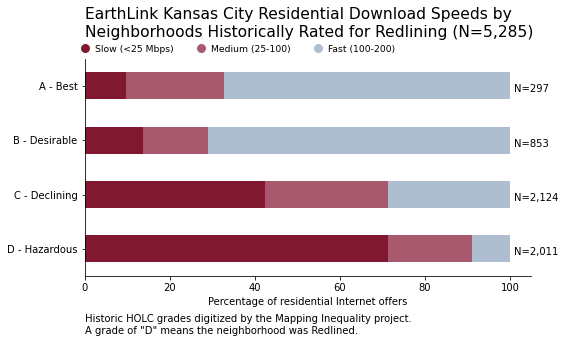

*******************************************************************************
las vegas NV 11928 CenturyLink


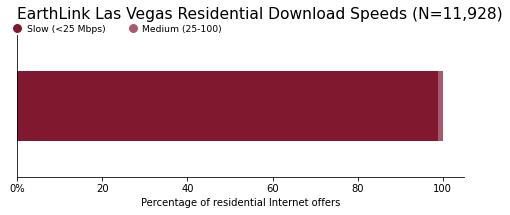

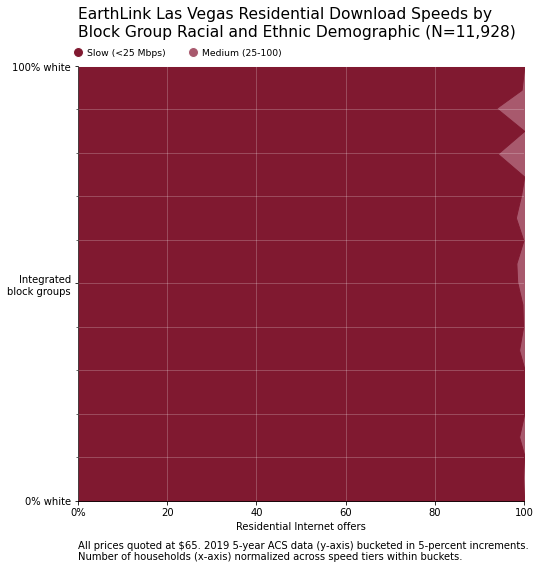

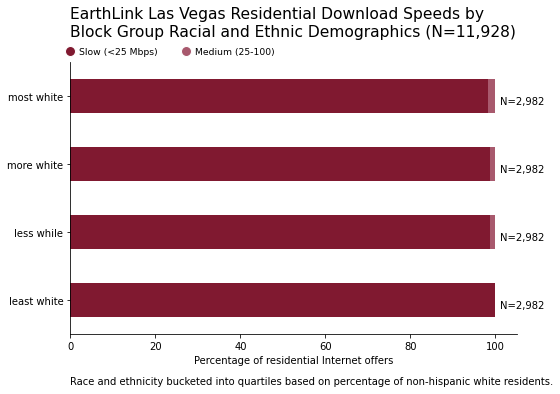

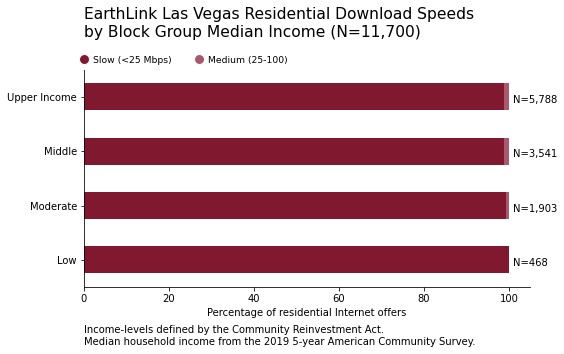

*******************************************************************************
little rock AR 5290 AT&T


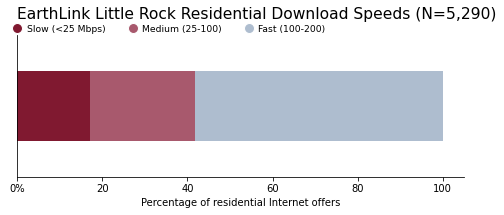

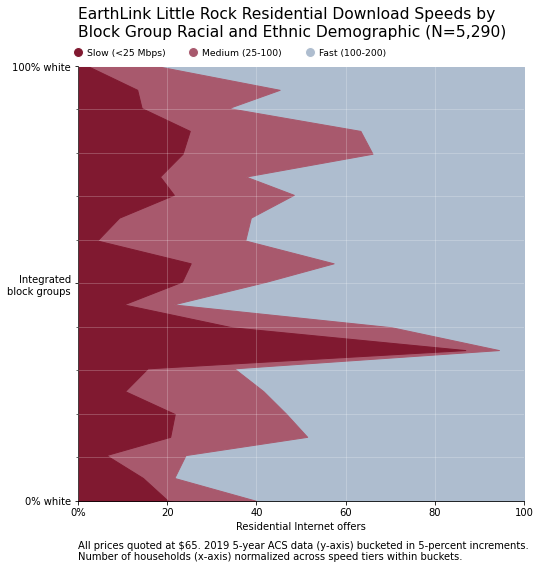

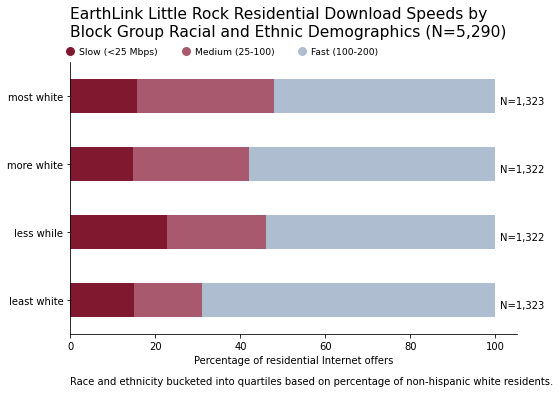

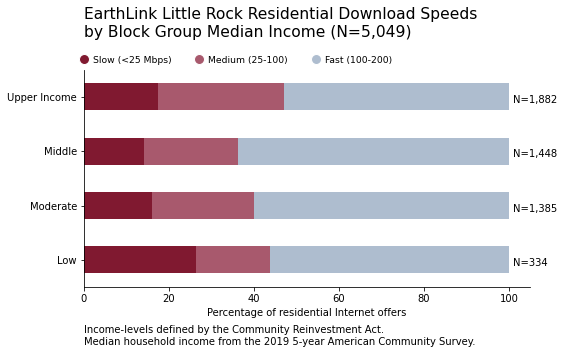

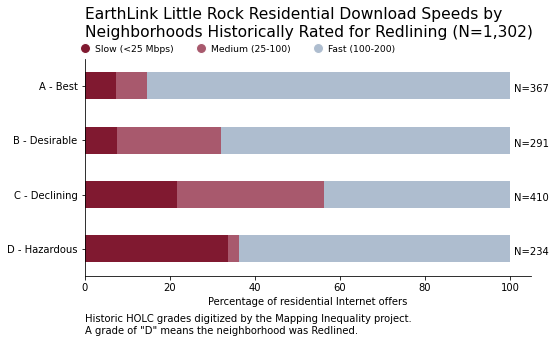

*******************************************************************************
los angeles CA 30510 AT&T


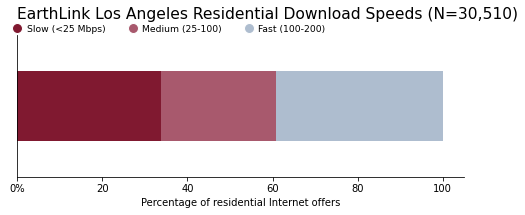

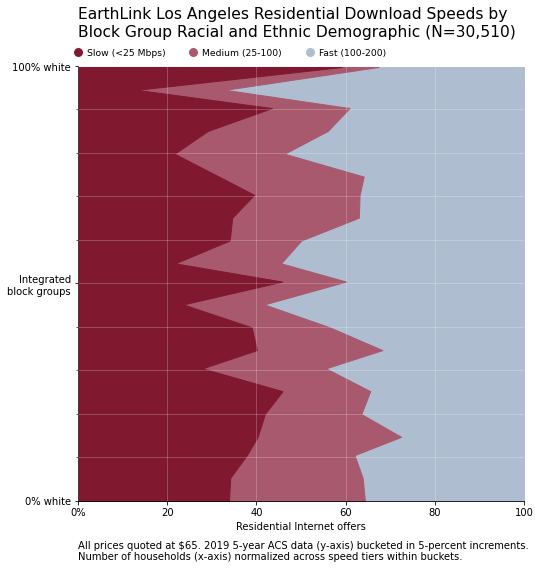

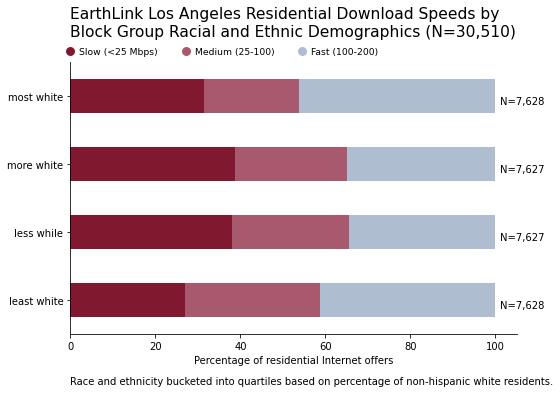

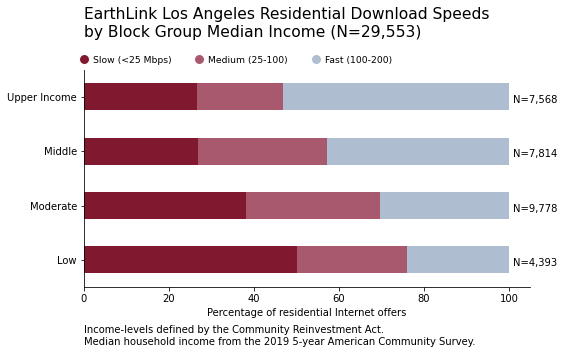

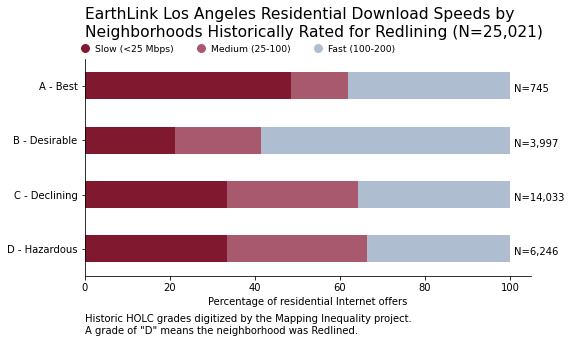

*******************************************************************************
louisville KY 7821 AT&T


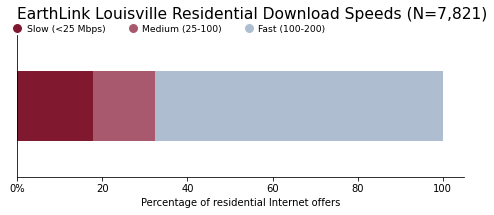

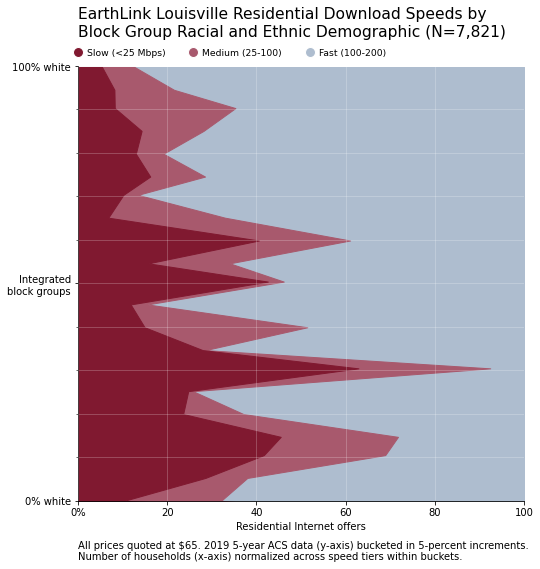

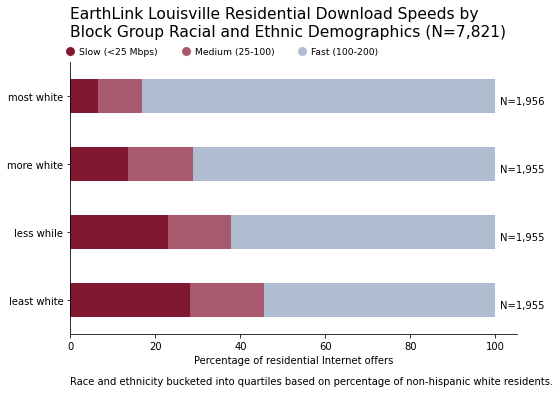

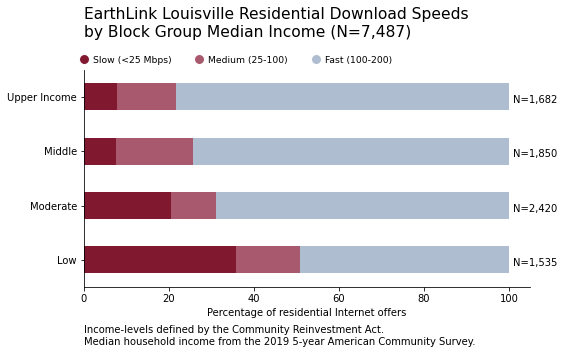

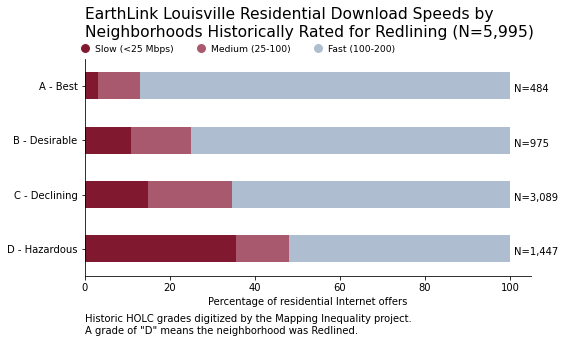

*******************************************************************************
memphis TN 13249 AT&T


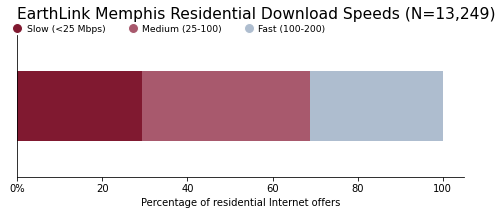

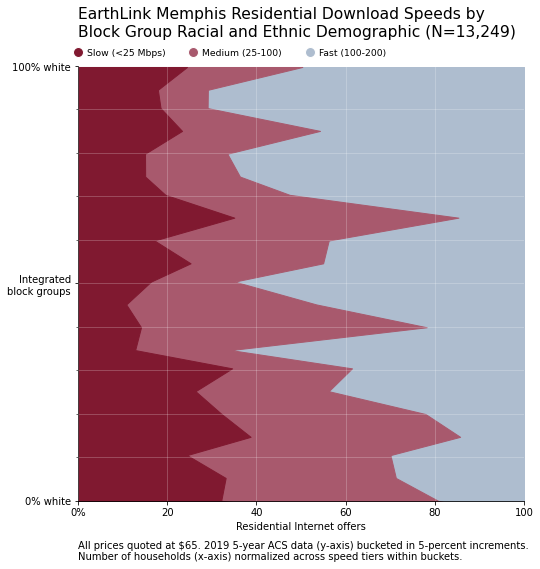

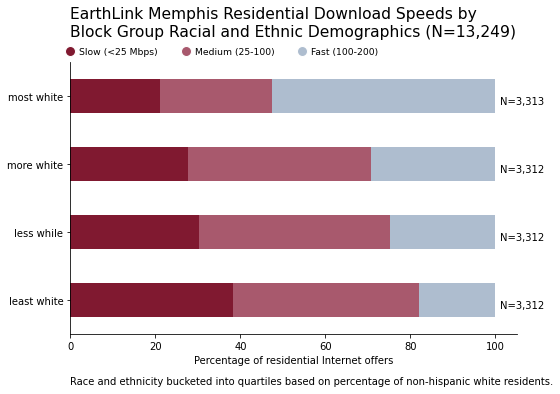

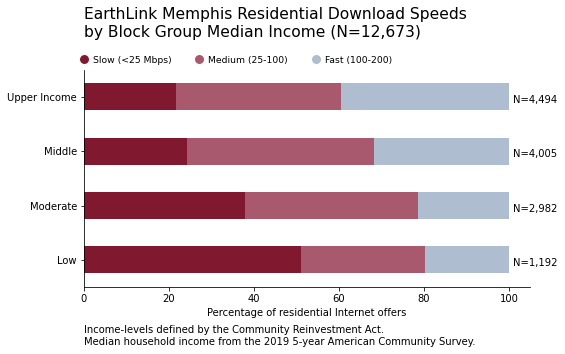

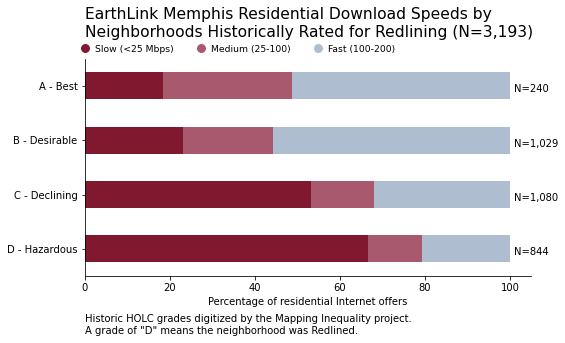

*******************************************************************************
milwaukee WI 13031 AT&T


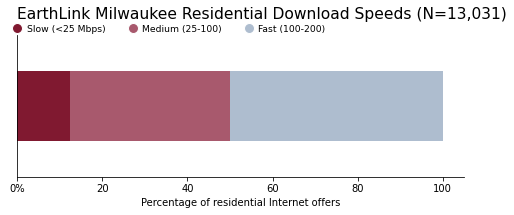

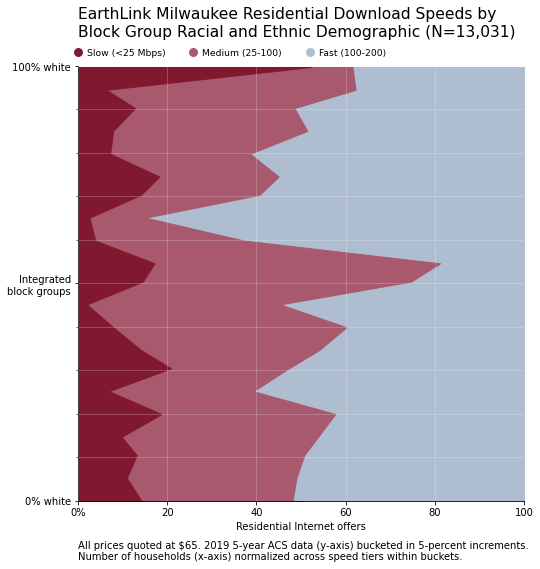

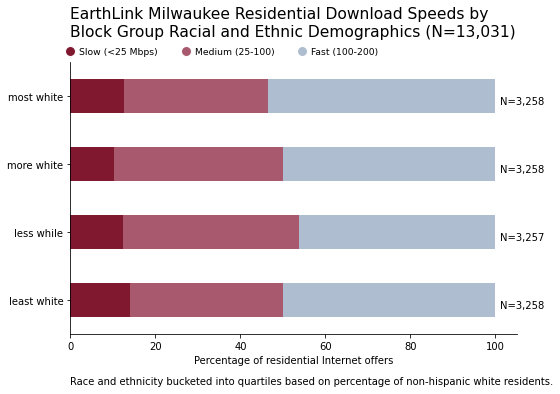

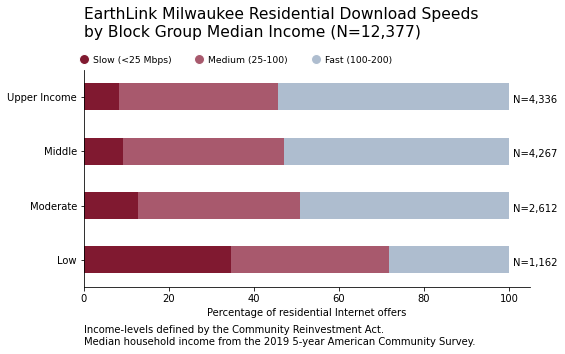

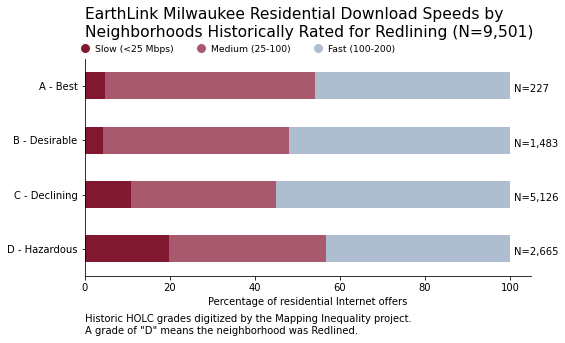

*******************************************************************************
new orleans LA 7370 AT&T


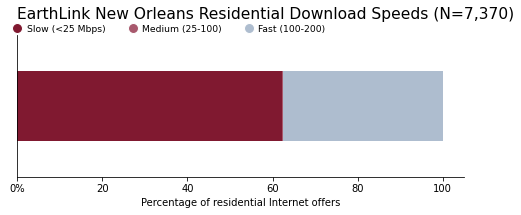

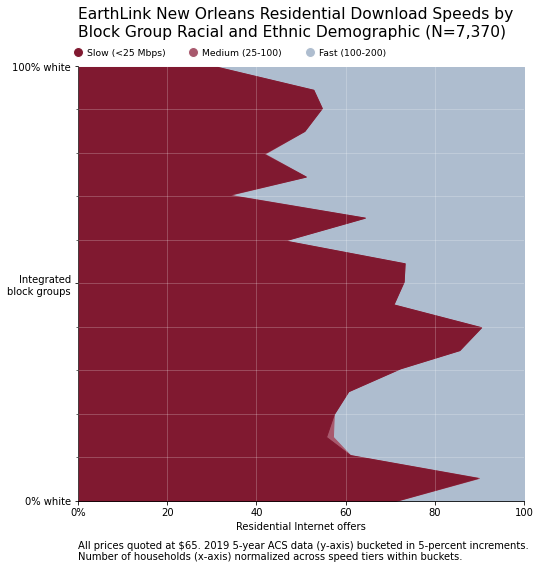

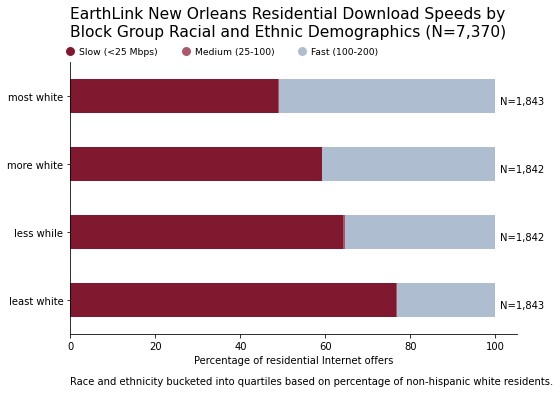

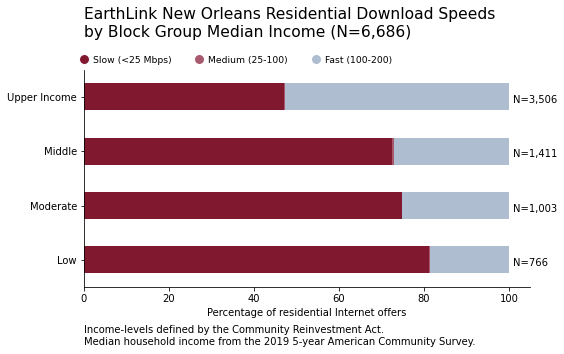

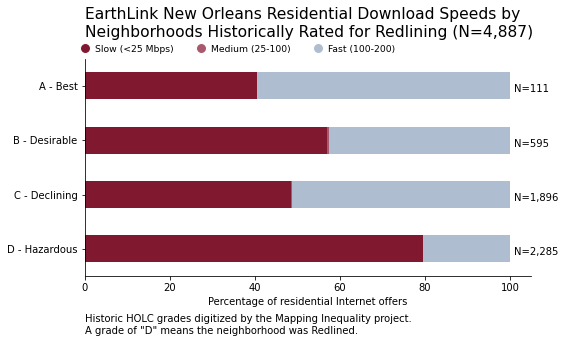

*******************************************************************************
oklahoma city OK 13654 AT&T


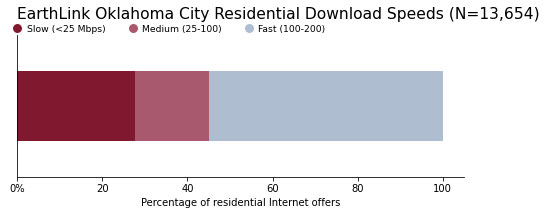

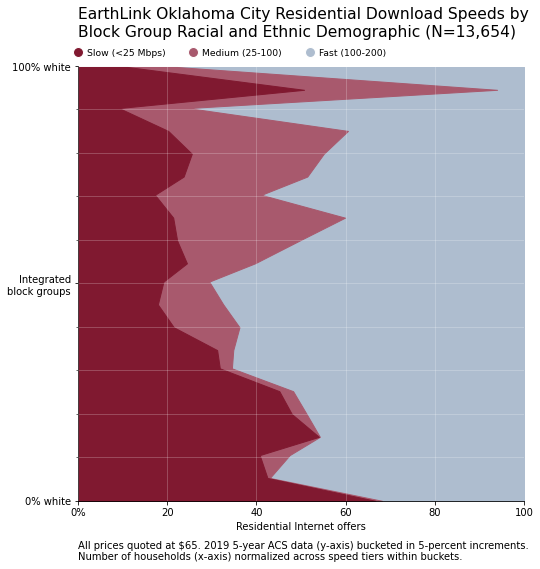

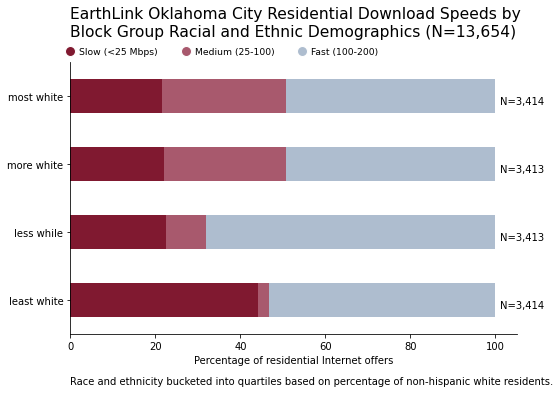

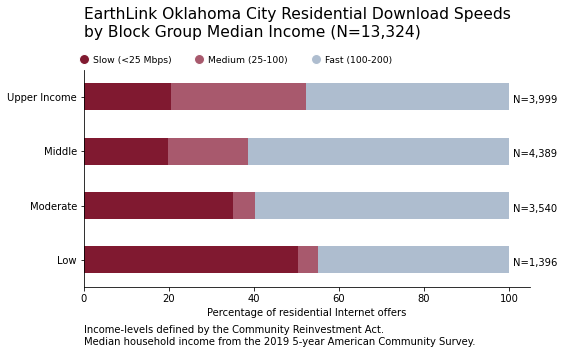

*******************************************************************************
wichita KS 10195 AT&T


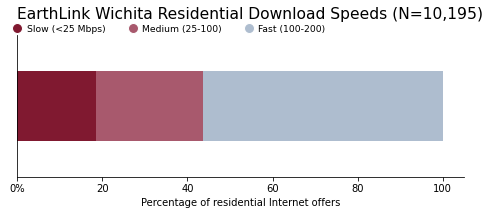

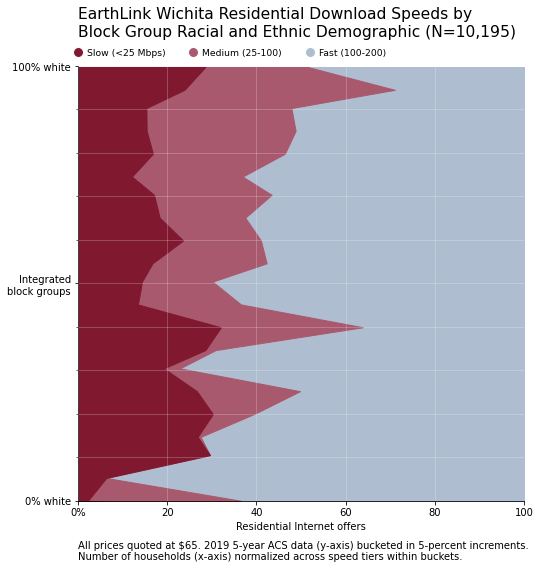

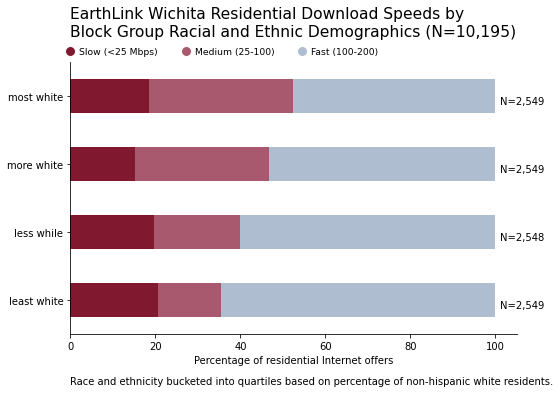

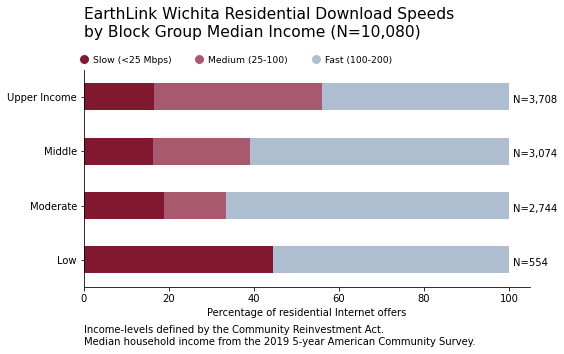

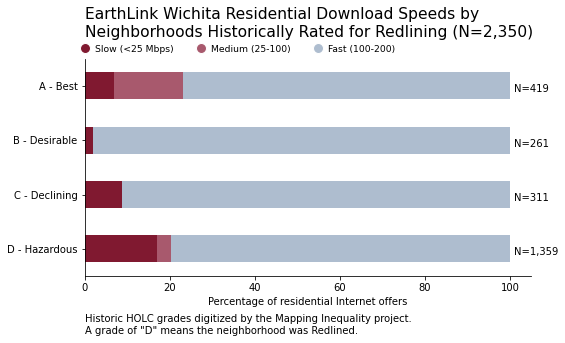

*******************************************************************************


In [22]:
for (city, state), _df in el.groupby(['major_city', 'state']):
    main_contractor = _df.contract_provider.value_counts().index[0]
    _df = bucket_and_bin(_df)
    print(city, state, len(_df), main_contractor)
    speed_breakdown(_df, location=city.title(), isp='EarthLink')
    plot_race(_df, location=city.title(), isp='EarthLink', price='$65')
    race(_df, location=city.title(), isp='EarthLink')
    income(_df, location=city.title(), isp='EarthLink')
    redlining(_df, location=city.title(), isp='EarthLink')
    print("*" * 79)